In [125]:
import pandas as pd
import pickle
import nltk
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.decomposition import NMF

In [2]:
with open('all_scripts.pickle','rb') as read_file:
    all_scripts = pickle.load(read_file)

all_scripts.head()

,Character,Line,Line_Number,Episode
0,Leslie Knope,Hello.,0,s1e01
1,Leslie Knope,Hi.,1,s1e01
2,Leslie Knope,"My name is Leslie Knope, and I work for the Pa...",2,s1e01
3,Leslie Knope,Can I ask you a few questions?,3,s1e01
4,Leslie Knope,"Would you say that you are, ""Enjoying yourself...",4,s1e01


In [19]:
import re
import string

alphanumeric = lambda x: re.sub('\w*\d\w*', ' ', x)
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())

all_scripts['Line'] = all_scripts.Line.map(alphanumeric).map(punc_lower)
all_scripts.head()

,Character,Line,Line_Number,Episode
0,Leslie Knope,hello,0,s1e01
1,Leslie Knope,hi,1,s1e01
2,Leslie Knope,my name is leslie knope and i work for the pa...,2,s1e01
3,Leslie Knope,can i ask you a few questions,3,s1e01
4,Leslie Knope,would you say that you are enjoying yourself...,4,s1e01


In [24]:
all_scripts['Word_Count'] = all_scripts['Line'].str.strip().str.split(" ").str.len()
all_scripts

,Character,Line,Line_Number,Episode,Word_Count
0,Leslie Knope,hello,0,s1e01,1
1,Leslie Knope,hi,1,s1e01,1
2,Leslie Knope,my name is leslie knope and i work for the pa...,2,s1e01,15
3,Leslie Knope,can i ask you a few questions,3,s1e01,7
4,Leslie Knope,would you say that you are enjoying yourself...,4,s1e01,32
...,...,...,...,...,...
988,Jerry Gergich,okay,988,s7e12,1
989,Ben Wyatt,you ready babe,989,s7e12,4
990,Leslie Knope,yes,990,s7e12,1
991,Leslie Knope,i m ready,991,s7e12,3


In [14]:
most_episodes = all_scripts.groupby('Character')['Episode'].nunique().sort_values(ascending = False)
most_episodes.head(11)

Character
Leslie Knope     122
Ron Swanson      121
April Ludgate    121
Tom Haverford    118
Andy Dwyer       114
Extra            111
Jerry Gergich    109
Donna Meagle     107
Ann Perkins       99
Ben Wyatt         94
Chris Traeger     74
Name: Episode, dtype: int64

In [26]:
most_episodes = all_scripts.groupby('Character')['Word_Count'].sum().sort_values(ascending = False)
most_episodes.head(11)

Character
Leslie Knope     141995
Tom Haverford     47167
Ron Swanson       38794
Ben Wyatt         38194
Andy Dwyer        37527
Ann Perkins       29122
April Ludgate     25522
Chris Traeger     22177
Extra             11866
Jerry Gergich      9451
Donna Meagle       9370
Name: Word_Count, dtype: int64

In [59]:
leslie = all_scripts[ all_scripts['Character'] == 'Leslie Knope' ]
leslie.head()

,Character,Line,Line_Number,Episode,Word_Count
0,Leslie Knope,hello,0,s1e01,1
1,Leslie Knope,hi,1,s1e01,1
2,Leslie Knope,my name is leslie knope and i work for the pa...,2,s1e01,15
3,Leslie Knope,can i ask you a few questions,3,s1e01,7
4,Leslie Knope,would you say that you are enjoying yourself...,4,s1e01,32


In [62]:
leslie['Episode_Text'] = leslie.groupby('Episode')['Line'].transform(lambda x : ' '.join(x)) 
leslie_episodes = leslie.drop(columns = ['Line', 'Line_Number', 'Word_Count'])
leslie_episodes.drop_duplicates(inplace = True)
leslie_episodes.reset_index(drop=True, inplace = True)
leslie_episodes.head()

<ipython-input-62-6ea343fd3591>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  leslie['Episode_Text'] = leslie.groupby('Episode')['Line'].transform(lambda x : ' '.join(x))


,Character,Episode,Episode_Text
0,Leslie Knope,s1e01,hello hi my name is leslie knope and i work...
1,Leslie Knope,s1e02,well one of the funner things that we do here...
2,Leslie Knope,s1e03,the parks department has so many programs jer...
3,Leslie Knope,s1e04,i don t believe it oh my god it s real hey...
4,Leslie Knope,s1e05,in a town as old as pawnee there s a lot of h...


In [ ]:
leslie['Line_Number'] = leslie['Line_Number'].astype(str)
leslie.head()

In [ ]:
leslie['Episode_Line_Num'] = leslie.Episode + leslie.Line_Number
leslie.head()

In [56]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [105]:
leslie_episodes['neg'] = leslie_episodes['Episode_Text'].apply(lambda x:analyzer.polarity_scores(x)['neg'])
leslie_episodes['neu'] = leslie_episodes['Episode_Text'].apply(lambda x:analyzer.polarity_scores(x)['neu'])
leslie_episodes['pos'] = leslie_episodes['Episode_Text'].apply(lambda x:analyzer.polarity_scores(x)['pos'])
leslie_episodes['season'] = leslie_episodes['Episode'].str[:2]
leslie_episodes.head()

,Character,Episode,Episode_Text,neg,neu,pos,season,compound
0,Leslie Knope,s1e01,hello hi my name is leslie knope and i work...,0.031,0.780,0.189,s1,0.9998
1,Leslie Knope,s1e02,well one of the funner things that we do here...,0.061,0.749,0.190,s1,0.9998
2,Leslie Knope,s1e03,the parks department has so many programs jer...,0.072,0.747,0.181,s1,0.9997
3,Leslie Knope,s1e04,i don t believe it oh my god it s real hey...,0.088,0.745,0.168,s1,0.9990
4,Leslie Knope,s1e05,in a town as old as pawnee there s a lot of h...,0.052,0.742,0.206,s1,0.9998


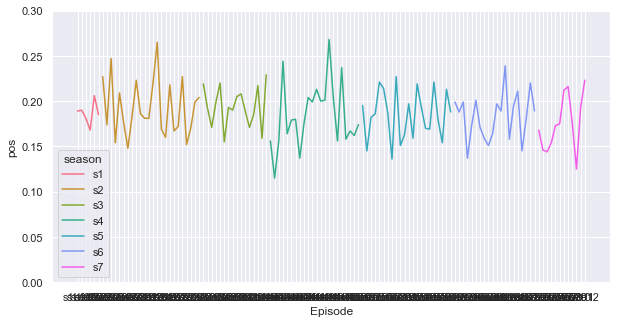

In [126]:
import seaborn as sns 


plt.rcParams["figure.figsize"] = (10,5)
fig, ax = plt.subplots() 
ax.set_ylim(0, .3)  
sns.lineplot(data = leslie_episodes, x = 'Episode', y = 'pos', hue = 'season', ax=ax);

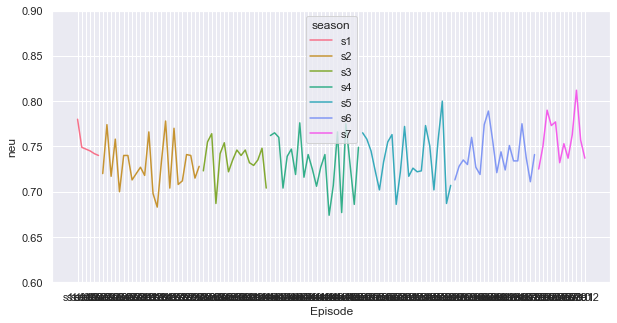

In [124]:
plt.rcParams["figure.figsize"] = (10,5)
fig, ax = plt.subplots() 
ax.set_ylim(.6, .9)  
sns.lineplot(data = leslie_episodes, x = 'Episode', y = 'neu', hue = 'season', ax=ax);

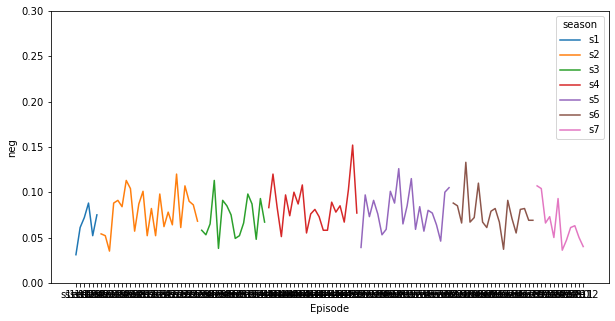

In [98]:
plt.rcParams["figure.figsize"] = (10,5)
fig, ax = plt.subplots() 
ax.set_ylim(0, .3)  
sns.lineplot(data = leslie_episodes, x = 'Episode', y = 'neg', hue = 'season', ax=ax);

In [106]:
from textblob import TextBlob

leslie_episodes['polar'] = leslie_episodes['Episode_Text'].apply(lambda x:TextBlob(x).sentiment[0])
leslie_episodes['subj'] = leslie_episodes['Episode_Text'].apply(lambda x:TextBlob(x).sentiment[1])
leslie_episodes.head()

,Character,Episode,Episode_Text,neg,neu,pos,season,compound,polar,subj
0,Leslie Knope,s1e01,hello hi my name is leslie knope and i work...,0.031,0.780,0.189,s1,0.9998,0.219030,0.485271
1,Leslie Knope,s1e02,well one of the funner things that we do here...,0.061,0.749,0.190,s1,0.9998,0.172772,0.536274
2,Leslie Knope,s1e03,the parks department has so many programs jer...,0.072,0.747,0.181,s1,0.9997,0.172255,0.542410
3,Leslie Knope,s1e04,i don t believe it oh my god it s real hey...,0.088,0.745,0.168,s1,0.9990,0.111730,0.505466
4,Leslie Knope,s1e05,in a town as old as pawnee there s a lot of h...,0.052,0.742,0.206,s1,0.9998,0.184389,0.502875


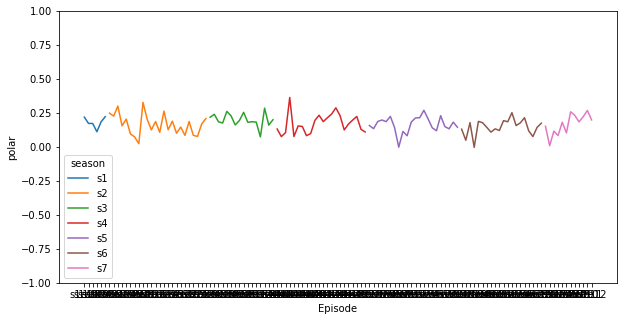

In [108]:
plt.rcParams["figure.figsize"] = (10,5)
fig, ax = plt.subplots() 
ax.set_ylim(-1, 1)  
sns.lineplot(data = leslie_episodes, x = 'Episode', y = 'polar', hue = 'season', ax=ax);

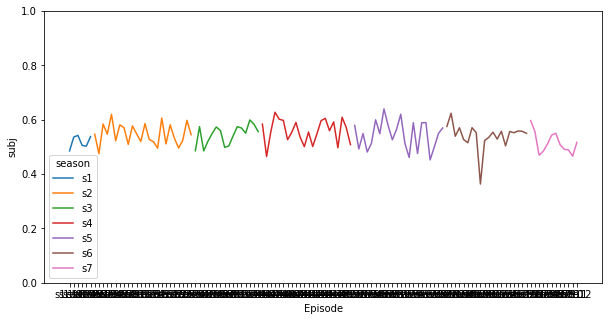

In [110]:
plt.rcParams["figure.figsize"] = (10,5)
fig, ax = plt.subplots() 
ax.set_ylim(0, 1)  
sns.lineplot(data = leslie_episodes, x = 'Episode', y = 'subj', hue = 'season', ax=ax);

In [137]:

all_leslie_text = leslie_episodes['Episode_Text']
comb = all_leslie_text.str.cat(sep = ' ')


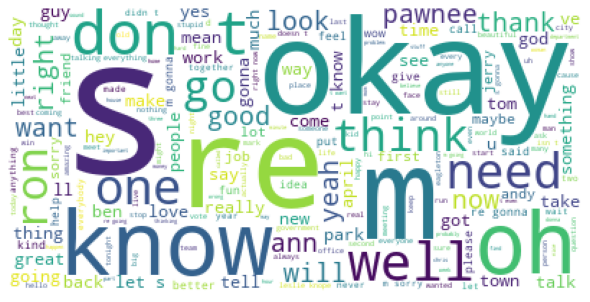

In [140]:
from wordcloud import WordCloud, STOPWORDS



stopwords = set(STOPWORDS)

wc = WordCloud(background_color="white",
                    max_words=200, 
                    stopwords=stopwords)
 
wc.generate(comb)
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wc) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 